# 使用Python进行描述性统计
    http://www.cnblogs.com/jasonfreak/p/5441512.html

    1 描述性统计是什么？
    2 使用NumPy和SciPy进行数值分析
      2.1 基本概念
      2.2 中心位置（均值、中位数、众数）
      2.3 发散程度（极差，方差、标准差、变异系数）
      2.4 偏差程度（z-分数）
      2.5 相关程度（协方差，相关系数）
      2.6 回顾
    3 使用Matplotlib进行图分析
      3.1 基本概念
      3.2 频数分析
        3.2.1 定性分析（柱状图、饼形图）
        3.2.2 定量分析（直方图、累积曲线）
      3.3 关系分析（散点图）
      3.4 探索分析（箱形图）
      3.5 回顾
    4 总结
    5 参考资料

## 1 描述性统计是什么？
    描述性统计是借助图表或者总结性的数值来描述数据的统计手段。数据挖掘工作的数据分析阶段，我们可借助描述性统计来描绘或总结数据的基本情况，一来可以梳理自己的思维，二来可以更好地向他人展示数据分析结果。数值分析的过程中，我们往往要计算出数据的统计特征，用来做科学计算的NumPy和SciPy工具可以满足我们的需求。Matpotlob工具可用来绘制图，满足图分析的需求。

## 2 使用NumPy和SciPy进行数值分析
### 2.1 基本概念
    与Python中原生的List类型不同，Numpy中用ndarray类型来描述一组数据：

In [1]:
import numpy as np
from numpy import array
from numpy.random import normal, randint

#使用List来创造一组数据
data = [1, 2, 3]
print(data)

[1, 2, 3]


In [2]:
#使用ndarray来创造一组数据
data = array([1, 2, 3])
print(data)

[1 2 3]


In [3]:
#创造一组服从正态分布的定量数据
data = normal(0, 10, size=10)
print(data)

[  2.24383637   1.86766317  -2.06715631   5.41825564   0.765509
   6.90756139  25.13586105  -2.10378382  -7.57914129   7.91958738]


In [4]:
#创造一组服从均匀分布的定性数据
data = randint(0, 10, size=10)
print(data)

[7 7 1 1 8 8 7 0 0 5]


### 2.2 中心位置（均值、中位数、众数）
      数据的中心位置是我们最容易想到的数据特征。借由中心位置，我们可以知道数据的一个平均情况，如果要对新数据进行预测，那么平均情况是非常直观地选择。数据的中心位置可分为均值（Mean），中位数（Median），众数（Mode）。其中均值和中位数用于定量的数据，众数用于定性的数据。
      
      对于定量数据（Data）来说，均值是总和除以总量（N），中位数是数值大小位于中间（奇偶总量处理不同）的值：
      
      均值相对中位数来说，包含的信息量更大，但是容易受异常的影响。使用NumPy计算均值与中位数：

In [5]:
from numpy import mean, median

#计算均值
mean(data)

4.4000000000000004

In [6]:
#计算中位数
median(data)

6.0

    对于定性数据来说，众数是出现次数最多的值，使用SciPy计算众数：

In [7]:
from scipy.stats import mode

# 计算众数
mode(data)

ModeResult(mode=array([7]), count=array([3]))

### 2.3 发散程度（极差、方差、标准差、变异系数）
    对数据的中心位置有所了解以后，一般我们会想要知道数据以中心位置为标准有多发散。如果以中心位置来预测新数据，那么发散程度决定了预测的准确性。数据的发散程度可用极差（PTP）、方差（Variance）、标准差（STD）、变异系数（CV）来衡量，它们的计算方法如下：
    
    极差是只考虑了最大值和最小值的发散程度指标，相对来说，方差包含了更多的信息，标准差基于方差但是与原始数据同量级，变异系数基于标准差但是进行了无量纲处理。使用NumPy计算极差、方差、标准差和变异系数：

In [8]:
# 极差ptp = max(data) - min(data)
np.ptp(data)

8

In [9]:
# 方差var = sum((data[i] - mean)^2) / N   i=1,2,3...N
np.var(data)

10.84

In [10]:
# 标准差std = var ^ 0.5
np.std(data)

3.2924155266308657

In [11]:
# 变异系数cv = std / mean
cv = np.std(data) / np.mean(data)
print(cv)

0.748276256052


### 2.4 偏差程度（z-分数）
    之前提到均值容易受异常值影响，那么如何衡量偏差，偏差到多少算异常是两个必须要解决的问题。定义z-分数（Z-Score）为测量值距均值相差的标准差数目：
    z-score = (data[i] - mean) / std
    通常来说，z-分数的绝对值大于3将视为异常。
    
    当标准差不为0且不为较接近于0的数时，z-分数是有意义的，使用NumPy计算z-分数：

In [12]:
# 计算第一个值的z分数
z_score = (data[1] - np.mean(data)) / np.std(data)
print(z_score)

0.789693761


### 2.5 相关程度
    有两组数据时，我们关心这两组数据是否相关，相关程度有多少。用协方差（COV）和相关系数（CORRCOEF）来衡量相关程度：
    cov = sum((data1[i] - mean1) * (data2[i] - mean2)) / N
    corrcoef = cov / std1 * std2
    
    协方差的绝对值越大表示相关程度越大，协方差为正值表示正相关，负值为负相关，0为不相关。相关系数是基于协方差但进行了无量纲处理。使用NumPy计算协方差和相关系数：

In [13]:
data1 = [1, 3, 9]
data2 = [2, 5, 8]
data = np.array([data1, data2])

#计算两组数的协方差
#参数bias=1表示结果需要除以N，否则只计算了分子部分
#返回结果为矩阵，第i行第j列的数据表示第i组数与第j组数的协方差。对角线为方差
np.cov(data, bias=1)

array([[ 11.55555556,   8.        ],
       [  8.        ,   6.        ]])

In [14]:
#计算两组数的相关系数
#返回结果为矩阵，第i行第j列的数据表示第i组数与第j组数的相关系数。对角线为1
np.corrcoef(data)

array([[ 1.        ,  0.96076892],
       [ 0.96076892,  1.        ]])

### 2.6 回顾
    包	方法	说明
    numpy	array	创造一组数
    numpy.random	normal	创造一组服从正态分布的定量数
    numpy.random	randint	创造一组服从均匀分布的定性数
    numpy	mean	计算均值
    numpy	median	计算中位数
    scipy.stats	mode	计算众数
    numpy	ptp	计算极差
    numpy	var	计算方差
    numpy	std	计算标准差
    numpy	cov	计算协方差
    numpy	corrcoef	计算相关系数

## 3 使用Matplotlib进行图分析
### 3.1 基本概念
    使用图分析可以更加直观地展示数据的分布（频数分析）和关系（关系分析）。柱状图和饼形图是对定性数据进行频数分析的常用工具，使用前需将每一类的频数计算出来。直方图和累积曲线是对定量数据进行频数分析的常用工具，直方图对应密度函数而累积曲线对应分布函数。散点图可用来对两组数据的关系进行描述。在没有分析目标时，需要对数据进行探索性的分析，箱形图将帮助我们完成这一任务。
    
    在此，我们使用一组容量为10000的男学生身高，体重，成绩数据来讲解如何使用Matplotlib绘制以上图形，创建数据的代码如下：

In [15]:
def gen_data():
    heights = []
    weights = []
    grades = []
    N = 10000
    
    for i in range(N):
        while True:
            # 身高用人均值172，标准差为6的正态分布
            height = np.random.normal(172, 6)
            if 0 < height:
                break
                
        while True:
            # 体重由身高作为自变量的线性回归模型产生，误差服从标准正态分布
            weight = (height - 80) * 0.7 + np.random.normal(0, 1)
            if 0 < weight:
                break
        
        while True:
            # 分数服从均值为70，标标准差为15的正态分布
            score = np.random.normal(70, 15)
            if 0 < score and score <= 100:
                grade = 'E' if score < 60\
                else ('D' if score < 70\
                      else ('C' if score < 80\
                           else ('B' if score < 90\
                                else 'A')))
                break
                
        heights.append(height)
        weights.append(weight)
        grades.append(grade)
    return np.array(heights), np.array(weights), np.array(grades)

heights, weights, grades = gen_data()
print(heights)
print(weights)
print(grades)

[ 182.57286619  177.13861489  174.98038307 ...,  174.62783531  174.48505248
  174.28198272]
[ 73.17335888  68.86656126  66.91940031 ...,  67.79098767  67.48591072
  65.35477401]
['B' 'E' 'C' ..., 'C' 'D' 'B']


### 3.2 频数分析
#### 3.2.1 定性分析（柱状图、饼形图）
    柱状图是以柱的高度来指代某种类型的频数，使用Matplotlib对成绩这一定性变量绘制柱状图的代码如下：

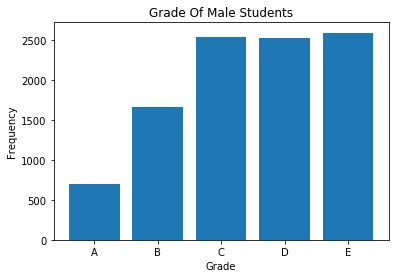

In [16]:
import matplotlib.pyplot as plt

# 绘制柱状图
def draw_bar(grades):
    xticks = ['A', 'B', 'C', 'D', 'E']
    grade_group = {}
    # 对每一类成绩进行频数统计
    for grade in grades:
        grade_group[grade] = grade_group.get(grade, 0) + 1
        
    # 创建柱状图
    # 第一个参数为柱的横坐标
    # 第二个参数为文字说明内容
    plt.bar(range(5), [grade_group.get(xtick, 0) for xtick in xticks],\
            align='center')
    
    # 设置柱的文字说明
    # 第一个参数为文字说明的横坐标
    # 第二个参数为文字说明的内容
    plt.xticks(range(5), xticks)
    
    # 设置横坐标的文字说明
    plt.xlabel('Grade')
    # 设置纵坐标的文字说明
    plt.ylabel('Frequency')
    # 设置标题
    plt.title('Grade Of Male Students')
    # 绘图
    plt.show()
    
    
draw_bar(grades)

    而饼形图是以扇形的面积来指代某种类型的频率，使用Matplotlib对成绩这一定性变量绘制饼形图的代码如下：

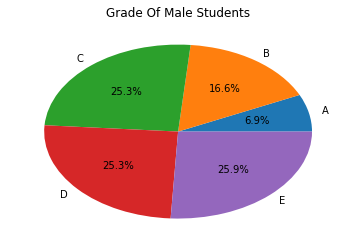

In [17]:
# 绘制饼形图
def draw_pie(grades):
    labels = ['A', 'B', 'C', 'D', 'E']
    grade_group = {}
    for grade in grades:
        grade_group[grade] = grade_group.get(grade, 0) + 1
    
    # 创建饼图
    # 第一个参数为扇形的面积
    # labels参数为扇形的说明文字 
    # autopct参数为扇形占比的显示格式
    plt.pie([grade_group.get(label, 0) for label in labels], \
            labels=labels, autopct='%1.1f%%')
    plt.title('Grade Of Male Students')
    plt.show()
    
draw_pie(grades)

#### 3.2.2 定量分析（直方图、累积曲线）
    直方图类似于柱状图，是用柱的高度来指代频数，不同的是其将定量数据划分为若干连续的区间，在这些连续的区间上绘制柱。使用Matplotlib对身高这一定量变量绘制直方图的代码如下：

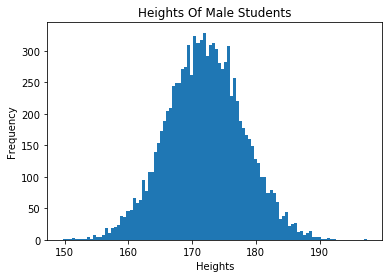

In [18]:
# 绘制直方图
def draw_hist(heights):
    # 第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
    # 第二个参数为划分的区间个数
    plt.hist(heights, 100)
    plt.xlabel('Heights')
    plt.ylabel('Frequency')
    plt.title('Heights Of Male Students')
    plt.show()
    
draw_hist(heights)

    直方图对应数据的密度函数，由于身高变量是属于服从正态分布的，从绘制出来的直方图上也可以直观地看出来

    使用Matplotlib对身高这一定量变量绘制累积曲线的代码如下：

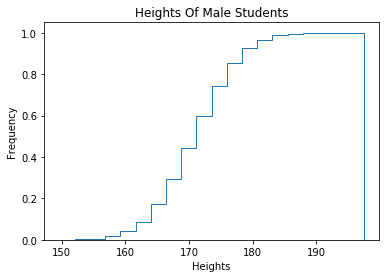

In [19]:
# 创建累积曲线
def draw_cumulative_hist(heights):
    # 创建累积曲线
    # 第一个参数为待绘制的定量数据
    # 第二个参数为划分的区间个数
    # normed参数为是否无量纲划
    # histtype参数为'step'，绘制阶梯状的曲线
    # cumulative参数为是否累积
    plt.hist(heights, 20, normed=True, histtype='step', cumulative=True)
    plt.xlabel('Heights')
    plt.ylabel('Frequency')
    plt.title('Heights Of Male Students')
    plt.show()
    
draw_cumulative_hist(heights)

    累积曲线对应数据的分布函数，由于身高变量是属于服从正态分布的，从绘制出来的累积曲线图上也可以直观地看出来：

### 3.3 关系分析（散点图）
    在散点图中，分别以自变量和因变量作为横纵坐标。当自变量与因变量线性相关时，在散点图中，点近似分布在一条直线上。我们以身高作为自变量，体重作为因变量，讨论身高对体重的影响。使用Matplotlib绘制散点图的代码如下：

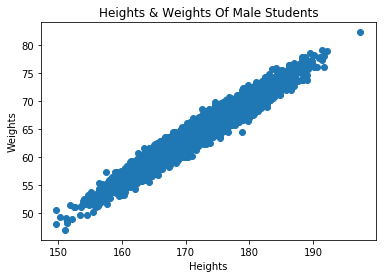

In [20]:
# 绘制散点图
def draw_scatter(heights, weights):
    # 第一个参数为点的横坐标
    # 第二个参数为点的纵坐标
    plt.scatter(heights, weights)
    plt.xlabel('Heights')
    plt.ylabel('Weights')
    plt.title('Heights & Weights Of Male Students')
    plt.show()
    
draw_scatter(heights, weights)

    我们在创建数据时，体重这一变量的确是由身高变量通过线性回归产生，绘制出来的散点图

### 3.4 探索分析（箱形图）
    在不明确数据分析的目标时，我们对数据进行一些探索性的分析，通过我们可以知道数据的中心位置，发散程度以及偏差程度。使用Matplotlib绘制关于身高的箱形图的代码如下：

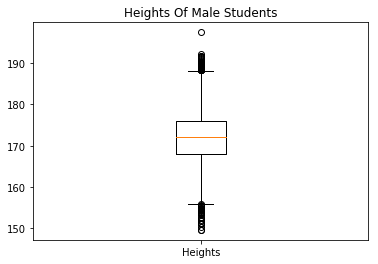

In [22]:
# 绘制箱形图
def draw_box(heights):
    # 第一个参数为待绘制的定量数据
    # 第二个参数为数据的文字说明
    plt.boxplot([heights], labels=['Heights'])
    plt.title('Heights Of Male Students')
    plt.show()
    
draw_box(heights)

    绘制出来的箱形图中，包含3种信息：

    Q2所指的红线为中位数
    Q1所指的蓝框下侧为下四分位数，Q3所指的蓝框上侧为上四分位数，Q3-Q1为四分为差。四分位差也是衡量数据的发散程度的指标之一。
    上界线和下界线是距离中位数1.5倍四分位差的线，高于上界线或者低于下界线的数据为异常值。

### 3.5 回顾
    方法	说明
    bar	柱状图
    pie	饼形图
    hist	直方图&累积曲线
    scatter	散点图
    boxplot	箱形图
    xticks	设置柱的文字说明
    xlabel	横坐标的文字说明
    ylabel	纵坐标的文字说明
    title	标题
    show	绘图

## 4 总结
    描述性统计是容易操作，直观简洁的数据分析手段。但是由于简单，对多元变量的关系难以描述。现实生活中，自变量通常是多元的：决定体重不仅有身高，还有饮食习惯，肥胖基因等等因素。通过一些高级的数据处理手段，我们可以对多元变量进行处理，例如特征工程中，可以使用互信息方法来选择多个对因变量有较强相关性的自变量作为特征，还可以使用主成分分析法来消除一些冗余的自变量来降低运算复杂度。